In [21]:
import os
import pandas as pd
from datetime import datetime


In [22]:
import pandas as pd

# Excel dosyasını oku (ilk satırı veri olarak al)
data = pd.read_excel("Top 200 Spotify Chart Full List.xlsx", header=None)

# İlk satırı sütun isimleri olarak ayarla
data.columns = data.iloc[0]  # İlk satır sütun isimleri
data = data[1:]  # İlk satırı çıkar, sadece verileri tut

# Sonuçları kontrol et
data.head()

,Artist,Track,Genre,Duration,Date,Stream (TR)
1,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-07 00:00:00,6287213
2,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-14 00:00:00,7731853
3,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-21 00:00:00,6409621
4,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-28 00:00:00,5939450
5,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-12-05 00:00:00,5460245


In [23]:
data = data.loc[:, ~data.columns.isna()]  # NaN sütunlarını filtrele
data

,Artist,Track,Genre,Duration,Date,Stream (TR)
1,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-07 00:00:00,6287213
2,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-14 00:00:00,7731853
3,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-21 00:00:00,6409621
4,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-28 00:00:00,5939450
5,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-12-05 00:00:00,5460245
...,...,...,...,...,...,...
1244,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,2024-12-05 00:00:00,900091
1245,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,2024-12-12 00:00:00,1031437
1246,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,2024-12-19 00:00:00,1131504
1247,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,2024-12-26 00:00:00,1186512


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 1 to 1248
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Artist       1248 non-null   object
 1   Track        1248 non-null   object
 2   Genre        1248 non-null   object
 3   Duration     1248 non-null   object
 4   Date         1248 non-null   object
 5   Stream (TR)  1248 non-null   object
dtypes: object(6)
memory usage: 58.6+ KB


In [25]:
import pandas as pd

# 'Stream (TR)' kolonunu 'Stream' olarak yeniden adlandır
data = data.rename(columns={"Stream (TR)": "Stream"})

# 'Duration' ve 'Stream' sütunlarını float olarak dönüştür
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')  # Hatalı değerler NaN yapılır
data['Stream'] = pd.to_numeric(data['Stream'], errors='coerce')
data['Track'] = data['Track'].astype(str)
data['Artist'] = data['Artist'].astype(str)
# 'Date' sütununu tarih formatına dönüştür
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Hatalı değerler NaT yapılır

# Sonuçları kontrol et
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 1 to 1248
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Artist    1248 non-null   object        
 1   Track     1248 non-null   object        
 2   Genre     1248 non-null   object        
 3   Duration  1248 non-null   int64         
 4   Date      1248 non-null   datetime64[ns]
 5   Stream    1248 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 58.6+ KB


In [26]:
data

,Artist,Track,Genre,Duration,Date,Stream
1,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-07,6287213
2,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-14,7731853
3,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-21,6409621
4,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-11-28,5939450
5,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,2024-12-05,5460245
...,...,...,...,...,...,...
1244,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,2024-12-05,900091
1245,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,2024-12-12,1031437
1246,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,2024-12-19,1131504
1247,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,2024-12-26,1186512


In [27]:
data.boxplot()

<Axes: >

In [28]:
data.set_index("Date",inplace=True)
data

,Artist,Track,Genre,Duration,Stream
Date,,,,,
2024-11-07,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,6287213
2024-11-14,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,7731853
2024-11-21,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,6409621
2024-11-28,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,5939450
2024-12-05,"Dedublüman, Aleyna Tilki",Sana Güvenmiyorum - Dedub Sessions,turkish pop,204,5460245
...,...,...,...,...,...
2024-12-05,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,900091
2024-12-12,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,1031437
2024-12-19,Ferdi Özbeğen,Dönsen Bile,classic turkish pop,203,1131504


In [29]:
# Her şarkı için benzersiz bir kimlik oluşturuyoruz
data['song_id'] = data['Artist'] + " - " + data['Track']



In [30]:
data1 = data.copy()
data1.reset_index(inplace=True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1248 non-null   datetime64[ns]
 1   Artist    1248 non-null   object        
 2   Track     1248 non-null   object        
 3   Genre     1248 non-null   object        
 4   Duration  1248 non-null   int64         
 5   Stream    1248 non-null   int64         
 6   song_id   1248 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 68.4+ KB


C:\Users\fturkoglu\AppData\Local\Temp\ipykernel_17800\623138151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_song['Date'] = pd.to_datetime(example_song['Date'], errors='coerce')  # Tarih formatına çevir


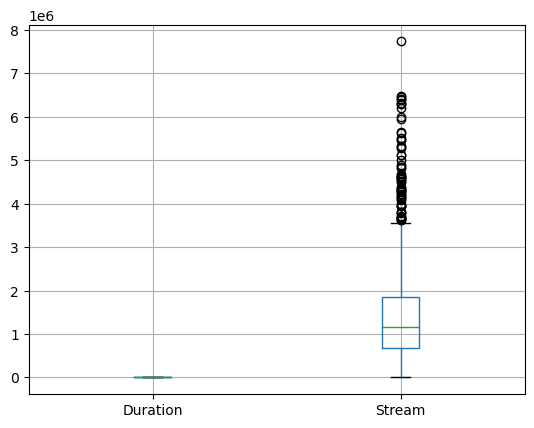

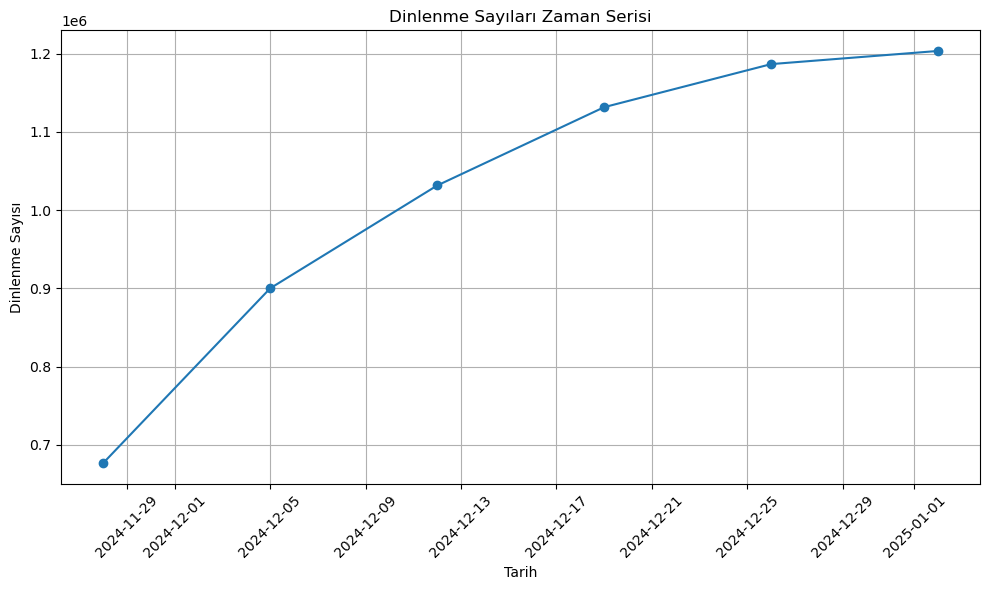

In [31]:
example_song = data1[data1['song_id'] == 'Ferdi Özbeğen - Dönsen Bile']

example_song['Date'] = pd.to_datetime(example_song['Date'], errors='coerce')  # Tarih formatına çevir
example_song = example_song.sort_values(by='Date')  # Tarih sırasına göre sıralama

# NaN tarihleri filtrele (varsa)
example_song = example_song.dropna(subset=['Date'])

# Zaman serisini görselleştirme
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Grafik boyutunu ayarla
plt.plot(example_song['Date'], example_song['Stream'], marker='o', linestyle='-')
plt.title("Dinlenme Sayıları Zaman Serisi")
plt.xlabel("Tarih")
plt.ylabel("Dinlenme Sayısı")
plt.grid(True)
plt.xticks(rotation=45)  # Tarih etiketlerini döndür
plt.tight_layout()  # Etiketlerin taşmasını engelle
plt.show()


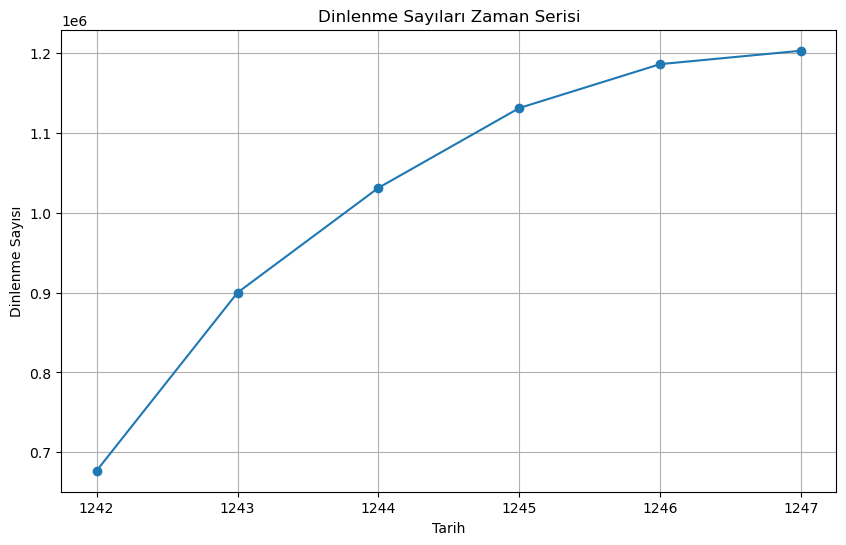

In [32]:
# Örnek bir şarkının zaman serisini seçme
example_song = data1[data1['song_id'] == 'Ferdi Özbeğen - Dönsen Bile']

# Tarihe göre sıralama (date zaten indeks olduğundan gerek yok, doğrudan indeks sırasına göre alınır)
example_song = example_song.sort_index()

# Zaman serisini görselleştirme
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(example_song.index, example_song['Stream'], marker='o')
plt.title("Dinlenme Sayıları Zaman Serisi")
plt.xlabel("Tarih")
plt.ylabel("Dinlenme Sayısı")
plt.grid(True)
plt.show()


In [33]:
data1.drop(columns=["Artist",'Track'],inplace=True)
data1

,Date,Genre,Duration,Stream,song_id
0,2024-11-07,turkish pop,204,6287213,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -..."
1,2024-11-14,turkish pop,204,7731853,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -..."
2,2024-11-21,turkish pop,204,6409621,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -..."
3,2024-11-28,turkish pop,204,5939450,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -..."
4,2024-12-05,turkish pop,204,5460245,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -..."
...,...,...,...,...,...
1243,2024-12-05,classic turkish pop,203,900091,Ferdi Özbeğen - Dönsen Bile
1244,2024-12-12,classic turkish pop,203,1031437,Ferdi Özbeğen - Dönsen Bile
1245,2024-12-19,classic turkish pop,203,1131504,Ferdi Özbeğen - Dönsen Bile
1246,2024-12-26,classic turkish pop,203,1186512,Ferdi Özbeğen - Dönsen Bile


In [34]:
distinct_values_genre = data1['Genre'].unique()
distinct_values_genre

array(['turkish pop', 'turkish hip hop', 'Turkish Hip-Hop; Turkce Drill',
       'Turkish Pop; Deep Turkish Pop',
       'turkish jazz; turkish pop; turkish singer-songwriter',
       'turkish hip hop; turkish pop; turkish trap',
       'Turkish Hip-Hop; Turkish Pop; Turkish Trap',
       'Turkish Pop; Turkish Hip-Hop',
       'Turkish Hip-Hop; New School Turkce Rap; Turkish Trap',
       'Turkish; Turkish Pop; Turkce Slow Sarkilar',
       'Turkish Hip-Hop; New School Turkce Rap',
       'Turkish Hip-Hop; Turkish',
       'arabesk; deep turkish pop; turkish pop',
       'turkish pop; turkish singer-songwriter',
       'turkish alternative rock; turkish rock',
       'turkish jazz; turkish pop; turkish rock', 'turkish rock',
       'anadolu rock; karadeniz halk muzigi; turkish alternative',
       'Turkish Pop; Turkish; Turkish Trap Pop',
       'turkish hip hop; turkish rock; turkish trap',
       'turkish hip hop; turkish trap', 'german hip hop',
       'turkish folk; turkish jazz; t

In [35]:
def classify_genre(genre):
    genre = genre.lower()  # Küçük harfe çevir
    if 'turkish pop' in genre or 'deep turkish pop' in genre or 'classic turkish pop' in genre:
        return 'Turkish Pop'
    elif 'turkish hip hop' in genre or 'turkish trap' in genre or 'drill' in genre:
        return 'Turkish Hip-Hop/Trap'
    elif 'turkish rock' in genre or 'alternative rock' in genre or 'anadolu rock' in genre:
        return 'Turkish Rock'
    elif 'turkish jazz' in genre or 'turkish folk' in genre or 'karadeniz halk muzigi' in genre:
        return 'Turkish Jazz/Folk'
    else:
        return 'Fusion/Other'

# Yeni kategori sütunu ekleme
data1['genre_category'] = data1['Genre'].apply(classify_genre)
data1

,Date,Genre,Duration,Stream,song_id,genre_category
0,2024-11-07,turkish pop,204,6287213,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",Turkish Pop
1,2024-11-14,turkish pop,204,7731853,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",Turkish Pop
2,2024-11-21,turkish pop,204,6409621,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",Turkish Pop
3,2024-11-28,turkish pop,204,5939450,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",Turkish Pop
4,2024-12-05,turkish pop,204,5460245,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",Turkish Pop
...,...,...,...,...,...,...
1243,2024-12-05,classic turkish pop,203,900091,Ferdi Özbeğen - Dönsen Bile,Turkish Pop
1244,2024-12-12,classic turkish pop,203,1031437,Ferdi Özbeğen - Dönsen Bile,Turkish Pop
1245,2024-12-19,classic turkish pop,203,1131504,Ferdi Özbeğen - Dönsen Bile,Turkish Pop
1246,2024-12-26,classic turkish pop,203,1186512,Ferdi Özbeğen - Dönsen Bile,Turkish Pop


In [36]:
data1 = pd.get_dummies(data1, columns=['genre_category'], prefix='genre')
data1

,Date,Genre,Duration,Stream,song_id,genre_Fusion/Other,genre_Turkish Hip-Hop/Trap,genre_Turkish Pop,genre_Turkish Rock
0,2024-11-07,turkish pop,204,6287213,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",False,False,True,False
1,2024-11-14,turkish pop,204,7731853,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",False,False,True,False
2,2024-11-21,turkish pop,204,6409621,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",False,False,True,False
3,2024-11-28,turkish pop,204,5939450,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",False,False,True,False
4,2024-12-05,turkish pop,204,5460245,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",False,False,True,False
...,...,...,...,...,...,...,...,...,...
1243,2024-12-05,classic turkish pop,203,900091,Ferdi Özbeğen - Dönsen Bile,False,False,True,False
1244,2024-12-12,classic turkish pop,203,1031437,Ferdi Özbeğen - Dönsen Bile,False,False,True,False
1245,2024-12-19,classic turkish pop,203,1131504,Ferdi Özbeğen - Dönsen Bile,False,False,True,False
1246,2024-12-26,classic turkish pop,203,1186512,Ferdi Özbeğen - Dönsen Bile,False,False,True,False


In [37]:
data1.drop(columns='Genre',inplace=True)

In [38]:
unique_song_ids_count = data1['song_id'].nunique()
print(unique_song_ids_count)

50


In [45]:

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1248 entries, 0 to 1247
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        1248 non-null   datetime64[ns]
 1   Duration                    1248 non-null   int64         
 2   Stream                      1248 non-null   int64         
 3   song_id                     1248 non-null   object        
 4   genre_Fusion/Other          1248 non-null   bool          
 5   genre_Turkish Hip-Hop/Trap  1248 non-null   bool          
 6   genre_Turkish Pop           1248 non-null   bool          
 7   genre_Turkish Rock          1248 non-null   bool          
dtypes: bool(4), datetime64[ns](1), int64(2), object(1)
memory usage: 44.0+ KB


In [ ]:
LinearRegression,Lasso,Ridge,ARIMA,SARIMA,naive,ortalama,winterholt,dynamic regression, dynamic harmonic regression

In [62]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Şarkı ID'lerini listeleme
song_ids = data1['song_id'].unique()

# Tahmin sonuçlarını ve performans metriklerini tutacak bir liste
forecasts = []

# Fonksiyon: Her bir model için tahmin ve performans hesaplama
def calculate_performance_and_forecast(train_series, actual_value, limited_models=False):
    results = {}

    # Naïve tahmin
    naive_forecast = train_series.iloc[-1]
    mae_naive = mean_absolute_error([actual_value], [naive_forecast])
    mse_naive = mean_squared_error([actual_value], [naive_forecast])
    results['naive'] = (mae_naive, mse_naive, naive_forecast)

    # Ortalama tahmin
    average_forecast = train_series.mean()
    mae_average = mean_absolute_error([actual_value], [average_forecast])
    mse_average = mean_squared_error([actual_value], [average_forecast])
    results['average'] = (mae_average, mse_average, average_forecast)

    # Hareketli Ortalama tahmini
    moving_average_forecast = train_series.iloc[-4:].mean() if len(train_series) >= 4 else train_series.mean()
    mae_moving_average = mean_absolute_error([actual_value], [moving_average_forecast])
    mse_moving_average = mean_squared_error([actual_value], [moving_average_forecast])
    results['moving_average'] = (mae_moving_average, mse_moving_average, moving_average_forecast)

    # Holt tahmini
    holt_model = ExponentialSmoothing(train_series, trend='add', seasonal=None)
    holt_fitted_model = holt_model.fit()
    holt_forecast = holt_fitted_model.forecast(1).iloc[0]
    mae_holt = mean_absolute_error([actual_value], [holt_forecast])
    mse_holt = mean_squared_error([actual_value], [holt_forecast])
    results['holt'] = (mae_holt, mse_holt, holt_forecast)

    # Damped Holt tahmini
    damped_holt_model = ExponentialSmoothing(train_series, trend='add', damped_trend=True, seasonal=None)
    damped_holt_fitted_model = damped_holt_model.fit()
    damped_holt_forecast = damped_holt_fitted_model.forecast(1).iloc[0]
    mae_damped_holt = mean_absolute_error([actual_value], [damped_holt_forecast])
    mse_damped_holt = mean_squared_error([actual_value], [damped_holt_forecast])
    results['damped_holt'] = (mae_damped_holt, mse_damped_holt, damped_holt_forecast)

    # Eğer sınırlı modeller uygulanacaksa ARIMA, SARIMA, SARIMAX ve benzeri modelleri atla
    if not limited_models:
        # ARIMA tahmini
        try:
            arima_model = ARIMA(train_series, order=(1, 1, 1)).fit()
            arima_forecast = arima_model.forecast(1)
            if len(arima_forecast) > 0:
                arima_forecast_value = arima_forecast.iloc[0]
                mae_arima = mean_absolute_error([actual_value], [arima_forecast_value])
                mse_arima = mean_squared_error([actual_value], [arima_forecast_value])
                results['arima'] = (mae_arima, mse_arima, arima_forecast_value)
            else:
                results['arima'] = (None, None, None)
        except Exception as e:
            print(f"ARIMA Error for song_id {song_id}: {e}")
            results['arima'] = (None, None, None)

        # SARIMA tahmini (otomatik parametre seçimi)
        try:
            sarima_model = auto_arima(train_series, seasonal=True, m=1, stepwise=True, suppress_warnings=True, error_action='ignore')
            sarima_forecast = sarima_model.predict(n_periods=1)
            if len(sarima_forecast) > 0:
                sarima_forecast_value = sarima_forecast[0]
                mae_sarima = mean_absolute_error([actual_value], [sarima_forecast_value])
                mse_sarima = mean_squared_error([actual_value], [sarima_forecast_value])
                results['sarima'] = (mae_sarima, mse_sarima, sarima_forecast_value)
            else:
                results['sarima'] = (None, None, None)
        except Exception as e:
            print(f"SARIMA Error for song_id {song_id}: {e}")
            results['sarima'] = (None, None, None)

        # Dynamic Regression (SARIMAX) tahmini
        try:
            dynamic_regression_model = SARIMAX(train_series, order=(1, 1, 1), trend='c')
            dynamic_regression_fitted = dynamic_regression_model.fit(disp=False)
            dynamic_regression_forecast = dynamic_regression_fitted.forecast(1)
            if len(dynamic_regression_forecast) > 0:
                dynamic_forecast_value = dynamic_regression_forecast.iloc[0]
                mae_dynamic_regression = mean_absolute_error([actual_value], [dynamic_forecast_value])
                mse_dynamic_regression = mean_squared_error([actual_value], [dynamic_forecast_value])
                results['dynamic_regression'] = (mae_dynamic_regression, mse_dynamic_regression, dynamic_forecast_value)
            else:
                results['dynamic_regression'] = (None, None, None)
        except Exception as e:
            print(f"SARIMAX Error for song_id {song_id}: {e}")
            results['dynamic_regression'] = (None, None, None)

    return results

# Tahmin işlemi
for song_id in song_ids:
    # Şarkı verisini seçip sıralıyoruz
    song_data = data1[data1['song_id'] == song_id].sort_index()
    time_series = song_data['Stream']

    # Şarkı haftası sayısı 2 veya daha azsa basit model kullan
    if len(time_series) <= 2:
        last_value_forecast = time_series.iloc[-1]
        forecasts.append({
            'song_id': song_id,
            'forecast_date': '2024-12-19',
            'best_model': 'naive',
            'forecast': last_value_forecast,
            'mae': None,
            'mse': None
        })
        continue

    # Zaman serisi yeterince uzun değilse, bu şarkıyı atla
    if len(time_series) < 1:
        continue

    # Şarkı tekrar sayısı 10'dan az mı?
    limited_models = len(time_series) < 2

    # 2024-12-12 haftası performans değerlendirme
    train_series_12_12 = time_series[:-1]  # 2024-12-12'ye kadar olan veriler
    actual_value_12_12 = time_series.iloc[-1]  # 2024-12-12 haftasının gerçek değeri
    performance_12_12 = calculate_performance_and_forecast(train_series_12_12, actual_value_12_12, limited_models)

    # En iyi modelin seçimi (2024-12-12 haftasına göre)
    valid_models = {k: v for k, v in performance_12_12.items() if v[0] is not None}  # None olmayan modelleri filtrele
    if valid_models:  # Eğer geçerli modeller varsa
        try:
            best_model = min(valid_models, key=lambda x: valid_models[x][0])  # En düşük MAE'ye göre
            best_forecast_value_12_19 = valid_models[best_model][2]  # 2024-12-19 için tahmin
        except KeyError as e:
            print(f"KeyError: {e}, valid_models: {valid_models}")
            best_model = None
            best_forecast_value_12_19 = None
    else:  # Geçerli model yoksa
        best_model = None
        best_forecast_value_12_19 = None

    # Sonuçları kaydet
    forecasts.append({
        'song_id': song_id,
        'forecast_date': '2024-12-19',
        'best_model': best_model,
        'forecast': best_forecast_value_12_19,
        'mae': performance_12_12.get(best_model, [None, None, None])[0] if best_model else None,
        'mse': performance_12_12.get(best_model, [None, None, None])[1] if best_model else None
    })

# Tahmin sonuçlarını DataFrame olarak kaydet
forecast_df = pd.DataFrame(forecasts)

# Tahmin edilen hafta için sonuçları görüntüleme
forecast_df

c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA Error for song_id Dedublüman, Aleyna Tilki - Sana Güvenmiyorum - Dedub Sessions: 0
SARIMA Error for song_id Ahiyan - Doldum: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index i

SARIMA Error for song_id Ati242 - Italy Forma: 0
SARIMA Error for song_id Simge, Era7capone, Ozan Bayraşa, SNOW - YANKI X İNTİHAR: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\st

SARIMA Error for song_id BLOK3 - SEVMEYİ DENEMEDİN: 0
SARIMA Error for song_id Derya Bedavacı - Seni Seven Kimdi: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\st

SARIMA Error for song_id Gökhan Türkmen, Sertab Erener - Açık Adres - SAYGI1: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Ati242 - Değişmene Rağmen: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Ati242 - Sönen Sigaralar: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Era7capone, NASTEISHA - İNTİHAR: 0
SARIMA Error for song_id Canbay & Wolker - Düşmez Kalkmaz: 0
SARIMA Error for song_id Burak Bulut - Ama Yine Sen: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\st

SARIMA Error for song_id Era7capone, Batuflex, Narco - CISTAK: 0
SARIMA Error for song_id Dedublüman - Sen Bilmezsin: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkogl

SARIMA Error for song_id Mansur Ark - Silinmez: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id BLOK3 - aklına ben gelicem: 0
ARIMA Error for song_id Jeff Redd, Era7capone, Wegh, EGE! - AM2TERDAM: too many indices for array: array is 0-dimensional, but 1 were indexed
SARIMA Error for song_id Jeff Redd, Era7capone, Wegh, EGE! - AM2TERDAM: too many indices for array: array is 0-dimensional, but 1 were indexed
SARIMAX Error for song_id Jeff Redd, Era7capone, Wegh, EGE! - AM2TERDAM: too many indices for array: array is 0-dimensional, but 1 were indexed
SARIMA Error for song_id M Lisa - VURDUM TELLERİNE: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Pr

SARIMA Error for song_id BLOK3 - UYUZ: 0
SARIMA Error for song_id Bengü - Saygımdan: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: 

SARIMA Error for song_id Melike Şahin - Canın Beni Çekti: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Ati242 - 25: 0
SARIMA Error for song_id Canozan - Acıtır gibi severek: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Göksel - Uzaktan: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: 

SARIMA Error for song_id Dedublüman, Can Kazaz - Bunca Yıl - Dedub Sessions: 0
SARIMA Error for song_id ElMusto, Organize - OF OF OF: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: 

SARIMA Error for song_id BLOK3 - GELME İSTEMEM: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Duman - Kufi: 0
SARIMA Error for song_id Afra - Yasemen: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: Convergence

SARIMA Error for song_id Ati242 - Telefon: 0
SARIMA Error for song_id BLOK3 - ESC*BAR: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Semicenk - Sen Kaldın: 0
SARIMA Error for song_id Soner Sarıkabadayı - Mevzu Derin: 0
SARIMAX Error for song_id Soner Sarıkabadayı - Mevzu Derin: LU decomposition error.


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Semicenk, Doğu Swag - Küle Dönmüşsün: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id BLOK3 - ZEHİRLİ GÜL: 0
SARIMA Error for song_id Mela Bedel - Ben Değilim: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

SARIMA Error for song_id Yalın - Halbuki: 0
ARIMA Error for song_id Kamuran Akkor, Sagopa Kajmer - Bir Ateşe Attın Beni: too many indices for array: array is 0-dimensional, but 1 were indexed
SARIMA Error for song_id Kamuran Akkor, Sagopa Kajmer - Bir Ateşe Attın Beni: too many indices for array: array is 0-dimensional, but 1 were indexed
SARIMAX Error for song_id Kamuran Akkor, Sagopa Kajmer - Bir Ateşe Attın Beni: too many indices for array: array is 0-dimensional, but 1 were indexed
SARIMA Error for song_id Ati242 - Kalbim Yanımda: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  ret

SARIMA Error for song_id Yener Çevik - Hüznü Hecem: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: 

SARIMA Error for song_id Ati242 - Kaptan: 0
SARIMA Error for song_id ZEDİ - Düşüşlerim Fazla: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: 

SARIMA Error for song_id Batuflex, Ali471 - I WANNA DANCE: 0
SARIMA Error for song_id Nazan Öncel - Beni Hatırla: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site

SARIMA Error for song_id Simge - Yankı: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\states

SARIMA Error for song_id Şebnem Ferah - Mayın Tarlası: 0
SARIMA Error for song_id Lady Gaga, Bruno Mars - Die With A Smile: 0
SARIMA Error for song_id Ferdi Özbeğen - Dönsen Bile: 0


c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\fturkoglu\Anaconda3\Lib\site-packages\statsmodels\tsa\base\t

,song_id,forecast_date,best_model,forecast,mae,mse
0,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",2024-12-19,arima,3.596846e+06,173820.518108,3.021357e+10
1,Ahiyan - Doldum,2024-12-19,average,3.136644e+06,149512.500000,2.235399e+10
2,Ati242 - Italy Forma,2024-12-19,dynamic_regression,3.044758e+06,207253.713262,4.295410e+10
3,"Simge, Era7capone, Ozan Bayraşa, SNOW - YANKI ...",2024-12-19,average,2.020589e+06,235265.000000,5.534962e+10
4,BLOK3 - SEVMEYİ DENEMEDİN,2024-12-19,dynamic_regression,2.607353e+06,63802.778825,4.070795e+09
5,Derya Bedavacı - Seni Seven Kimdi,2024-12-19,arima,2.546119e+06,89982.062341,8.096772e+09
6,"Gökhan Türkmen, Sertab Erener - Açık Adres - S...",2024-12-19,arima,2.106134e+06,258561.334375,6.685396e+10
7,Ati242 - Değişmene Rağmen,2024-12-19,holt,2.419574e+06,162113.303830,2.628072e+10
8,Ati242 - Sönen Sigaralar,2024-12-19,average,2.254488e+06,91297.909091,8.335308e+09
9,"Era7capone, NASTEISHA - İNTİHAR",2024-12-19,damped_holt,2.321087e+06,36744.201886,1.350136e+09


In [63]:
forecast_df

,song_id,forecast_date,best_model,forecast,mae,mse
0,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",2024-12-19,arima,3.596846e+06,173820.518108,3.021357e+10
1,Ahiyan - Doldum,2024-12-19,average,3.136644e+06,149512.500000,2.235399e+10
2,Ati242 - Italy Forma,2024-12-19,dynamic_regression,3.044758e+06,207253.713262,4.295410e+10
3,"Simge, Era7capone, Ozan Bayraşa, SNOW - YANKI ...",2024-12-19,average,2.020589e+06,235265.000000,5.534962e+10
4,BLOK3 - SEVMEYİ DENEMEDİN,2024-12-19,dynamic_regression,2.607353e+06,63802.778825,4.070795e+09
5,Derya Bedavacı - Seni Seven Kimdi,2024-12-19,arima,2.546119e+06,89982.062341,8.096772e+09
6,"Gökhan Türkmen, Sertab Erener - Açık Adres - S...",2024-12-19,arima,2.106134e+06,258561.334375,6.685396e+10
7,Ati242 - Değişmene Rağmen,2024-12-19,holt,2.419574e+06,162113.303830,2.628072e+10
8,Ati242 - Sönen Sigaralar,2024-12-19,average,2.254488e+06,91297.909091,8.335308e+09
9,"Era7capone, NASTEISHA - İNTİHAR",2024-12-19,damped_holt,2.321087e+06,36744.201886,1.350136e+09


In [64]:
forecast_df

,song_id,forecast_date,best_model,forecast,mae,mse
0,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",2024-12-19,arima,3.596846e+06,173820.518108,3.021357e+10
1,Ahiyan - Doldum,2024-12-19,average,3.136644e+06,149512.500000,2.235399e+10
2,Ati242 - Italy Forma,2024-12-19,dynamic_regression,3.044758e+06,207253.713262,4.295410e+10
3,"Simge, Era7capone, Ozan Bayraşa, SNOW - YANKI ...",2024-12-19,average,2.020589e+06,235265.000000,5.534962e+10
4,BLOK3 - SEVMEYİ DENEMEDİN,2024-12-19,dynamic_regression,2.607353e+06,63802.778825,4.070795e+09
5,Derya Bedavacı - Seni Seven Kimdi,2024-12-19,arima,2.546119e+06,89982.062341,8.096772e+09
6,"Gökhan Türkmen, Sertab Erener - Açık Adres - S...",2024-12-19,arima,2.106134e+06,258561.334375,6.685396e+10
7,Ati242 - Değişmene Rağmen,2024-12-19,holt,2.419574e+06,162113.303830,2.628072e+10
8,Ati242 - Sönen Sigaralar,2024-12-19,average,2.254488e+06,91297.909091,8.335308e+09
9,"Era7capone, NASTEISHA - İNTİHAR",2024-12-19,damped_holt,2.321087e+06,36744.201886,1.350136e+09


In [65]:
forecast_df.to_excel('forecasts_with_metrics_13-19_december.xlsx', index=False)

In [66]:
forecast_df

,song_id,forecast_date,best_model,forecast,mae,mse
0,"Dedublüman, Aleyna Tilki - Sana Güvenmiyorum -...",2024-12-19,arima,3.596846e+06,173820.518108,3.021357e+10
1,Ahiyan - Doldum,2024-12-19,average,3.136644e+06,149512.500000,2.235399e+10
2,Ati242 - Italy Forma,2024-12-19,dynamic_regression,3.044758e+06,207253.713262,4.295410e+10
3,"Simge, Era7capone, Ozan Bayraşa, SNOW - YANKI ...",2024-12-19,average,2.020589e+06,235265.000000,5.534962e+10
4,BLOK3 - SEVMEYİ DENEMEDİN,2024-12-19,dynamic_regression,2.607353e+06,63802.778825,4.070795e+09
5,Derya Bedavacı - Seni Seven Kimdi,2024-12-19,arima,2.546119e+06,89982.062341,8.096772e+09
6,"Gökhan Türkmen, Sertab Erener - Açık Adres - S...",2024-12-19,arima,2.106134e+06,258561.334375,6.685396e+10
7,Ati242 - Değişmene Rağmen,2024-12-19,holt,2.419574e+06,162113.303830,2.628072e+10
8,Ati242 - Sönen Sigaralar,2024-12-19,average,2.254488e+06,91297.909091,8.335308e+09
9,"Era7capone, NASTEISHA - İNTİHAR",2024-12-19,damped_holt,2.321087e+06,36744.201886,1.350136e+09


In [72]:
def get_best_predictions(song_name, forecast_df):
    # Şarkı verisini filtrele
    song_data = forecast_df[forecast_df['song_id'] == song_name]
    
    if not song_data.empty:
        # En iyi MAE yöntemi ve tahmini seçme
        best_mae_method = song_data['best_model'].iloc[0]
        best_mae_prediction = int(song_data['forecast'].iloc[0])
        
        # Sonuçları döndür
        return {
            'Song Name': song_name,
            'Best Method': best_mae_method,
            'Prediction (2024-12-19)': best_mae_prediction
        }
    else:
        return f"No data found for song: {song_name}"

# Örnek kullanım:
result = get_best_predictions('Ati242 - Değişmene Rağmen', forecast_df)
result


{'Song Name': 'Ati242 - Değişmene Rağmen',
 'Best Method': 'moving_average',
 'Prediction (2024-12-19)': 2817411}